__Задание 1__ 

Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
#функция среднеквадратичной ошибки:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
#функция обучения градиентного бустинга:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction):.1f}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction):.1f}')

In [10]:
def get_error_plot(n_trees, max_depth, train_err, test_err):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.title(f'{n_trees} trees, max_depth {max_depth}')
    plt.show()

In [11]:
max_depth = 5
eta = 0.1

In [12]:
n_trees_range = [x for x in range (2, 5)] + [x * 5 for x in range (1, 5)] + [x * 10 for x in range(3, 6)]
n_trees_range

[2, 3, 4, 5, 10, 15, 20, 30, 40, 50]

Ошибка алгоритма из 2 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 20039.9
Ошибка алгоритма из 2 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 18918.7


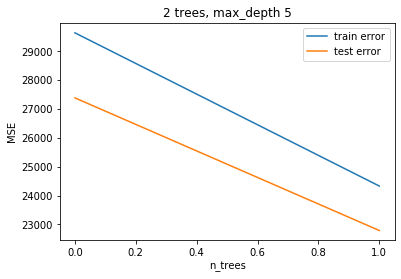

Ошибка алгоритма из 3 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 16552.9
Ошибка алгоритма из 3 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 15716.9


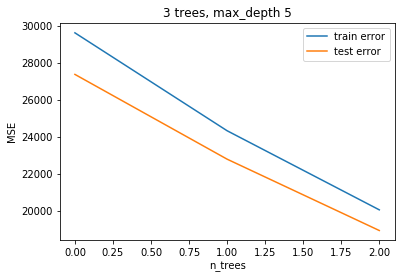

Ошибка алгоритма из 4 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 13694.7
Ошибка алгоритма из 4 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 13328.7


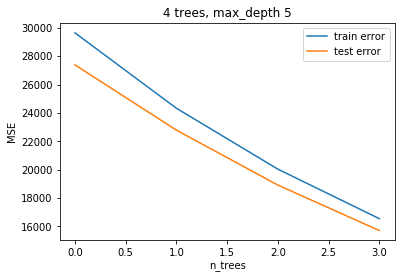

Ошибка алгоритма из 5 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 11374.2
Ошибка алгоритма из 5 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 11214.7


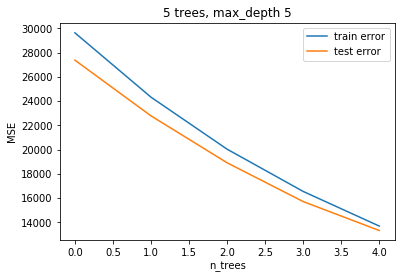

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 4738.6
Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 5808.2


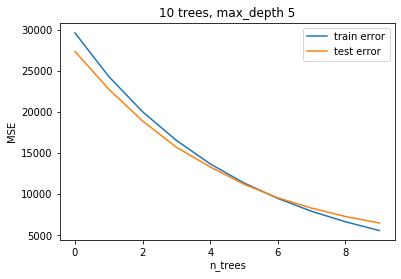

Ошибка алгоритма из 15 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 2242.4
Ошибка алгоритма из 15 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 4164.4


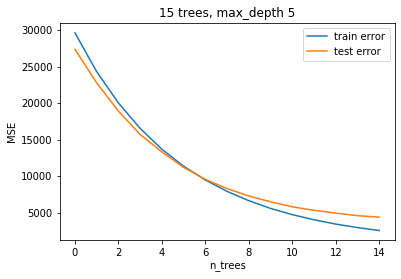

Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 1271.1
Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 3642.4


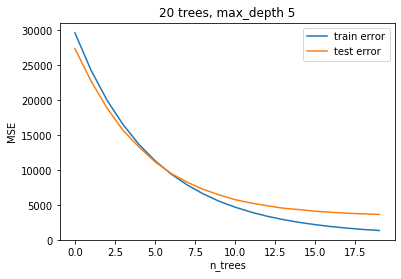

Ошибка алгоритма из 30 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 626.3
Ошибка алгоритма из 30 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 3639.1


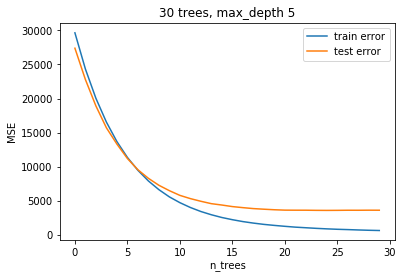

Ошибка алгоритма из 40 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 395.8
Ошибка алгоритма из 40 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 3747.2


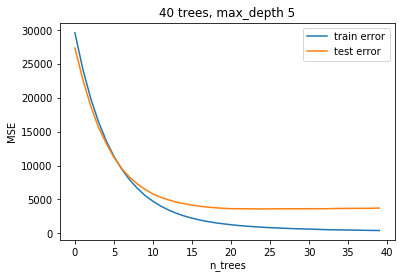

Ошибка алгоритма из 50 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 293.0
Ошибка алгоритма из 50 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 3797.0


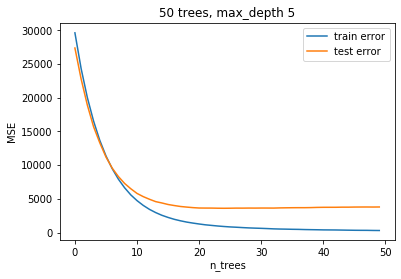

In [13]:
for n_trees in n_trees_range:
    coef = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coef, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coef, eta)
    get_error_plot(n_trees, max_depth, train_errors, test_errors)

Мы видим, что с увеличением количества деревьев, качество предсказаний растёт, но при 30 деревьях на тестовой выборке качество предсказания будет удовлетворительным, тогда как при продолжении увеличения количества деревьев на тренировочной выборке снижается MSE , на тестовой наблюдается увеличение MSE(при росте количества деревьев от 30)

In [16]:
n_trees = 30
coefs = [1] * n_trees
max_depth_range = [x for x in range(1, 5)] + [x * 5 for x in range(1, 7)]
max_depth_range

[1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

Ошибка алгоритма из 30 деревьев глубиной 1 с шагом 0.1 на тренировочной выборке: 2918.1
Ошибка алгоритма из 30 деревьев глубиной 1 с шагом 0.1 на тестовой выборке: 3410.8


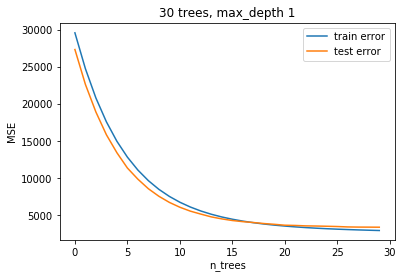

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 2347.2
Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.1 на тестовой выборке: 3331.0


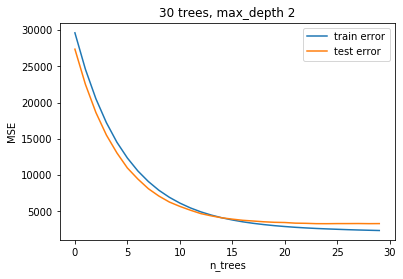

Ошибка алгоритма из 30 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 1739.9
Ошибка алгоритма из 30 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 3372.6


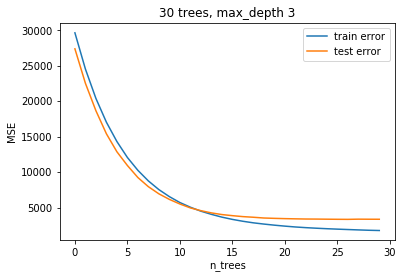

Ошибка алгоритма из 30 деревьев глубиной 4 с шагом 0.1 на тренировочной выборке: 1102.4
Ошибка алгоритма из 30 деревьев глубиной 4 с шагом 0.1 на тестовой выборке: 3355.9


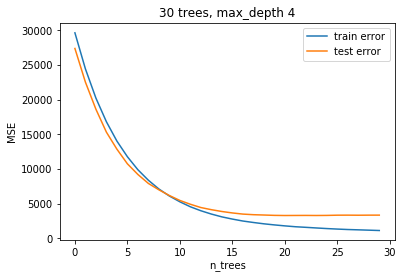

Ошибка алгоритма из 30 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 626.3
Ошибка алгоритма из 30 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 3639.1


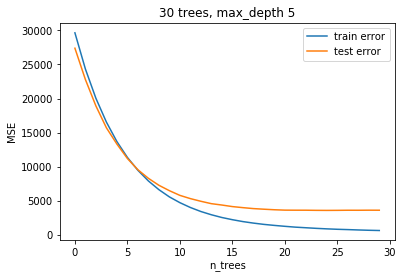

Ошибка алгоритма из 30 деревьев глубиной 10 с шагом 0.1 на тренировочной выборке: 57.0
Ошибка алгоритма из 30 деревьев глубиной 10 с шагом 0.1 на тестовой выборке: 5557.6


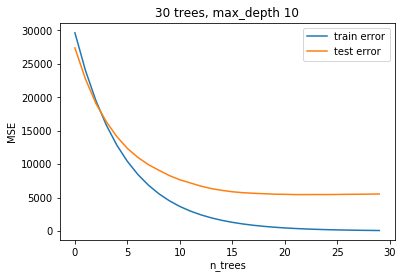

Ошибка алгоритма из 30 деревьев глубиной 15 с шагом 0.1 на тренировочной выборке: 53.3
Ошибка алгоритма из 30 деревьев глубиной 15 с шагом 0.1 на тестовой выборке: 7393.7


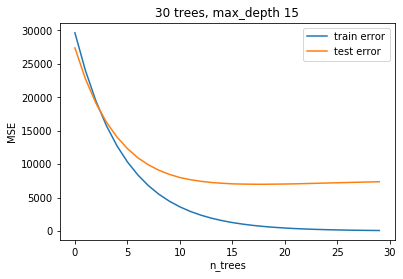

Ошибка алгоритма из 30 деревьев глубиной 20 с шагом 0.1 на тренировочной выборке: 53.3
Ошибка алгоритма из 30 деревьев глубиной 20 с шагом 0.1 на тестовой выборке: 7490.3


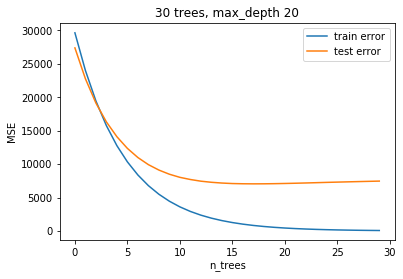

Ошибка алгоритма из 30 деревьев глубиной 25 с шагом 0.1 на тренировочной выборке: 53.3
Ошибка алгоритма из 30 деревьев глубиной 25 с шагом 0.1 на тестовой выборке: 7490.3


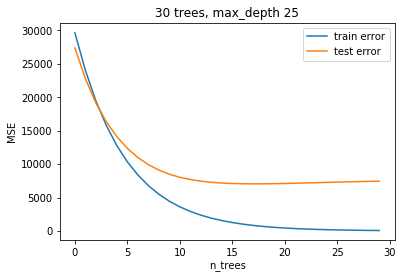

Ошибка алгоритма из 30 деревьев глубиной 30 с шагом 0.1 на тренировочной выборке: 53.3
Ошибка алгоритма из 30 деревьев глубиной 30 с шагом 0.1 на тестовой выборке: 7490.3


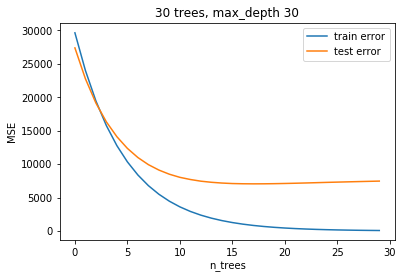

In [17]:
for max_depth in max_depth_range:
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    get_error_plot(n_trees, max_depth, train_errors, test_errors)

Наилучший результат мы наблюдаем при глубине деревьев равной 2, при более глубоких реализациях модель начинает переобучаться - MSE на тренировочной выборке падает, на тестовой растет 

In [19]:
trees = 30
max_depth = 2
coefs = [1] * n_trees

eta_range = [10 ** -x for x in range(4)]
eta_range

[1, 0.1, 0.01, 0.001]

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 1 на тренировочной выборке: 900.7
Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 1 на тестовой выборке: 4765.8


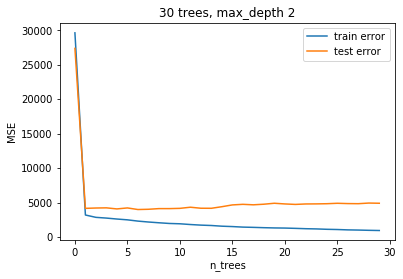

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 2347.2
Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.1 на тестовой выборке: 3331.0


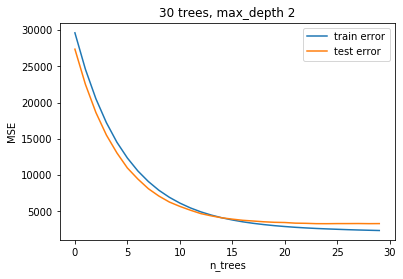

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.01 на тренировочной выборке: 17659.2
Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.01 на тестовой выборке: 15938.7


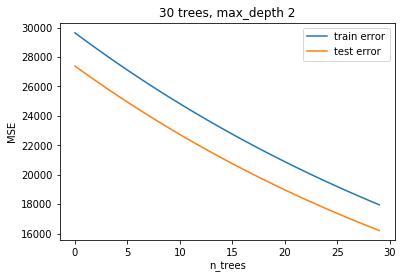

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.001 на тренировочной выборке: 28099.7
Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.001 на тестовой выборке: 25893.1


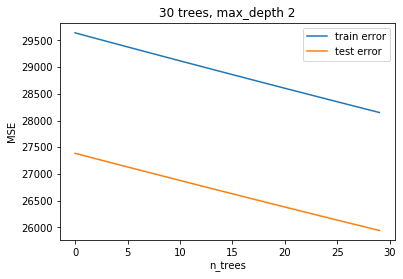

In [20]:
for eta in eta_range:
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    get_error_plot(n_trees, max_depth, train_errors, test_errors)

Оптимальный шаг = 0.1
При большом значении алгоритм не достигается нужная точность прогноза, при меньшей - алгоритм не сходится 